<a href="https://colab.research.google.com/github/Interativa-TI/pharmusmc-adm-sample/blob/main/Volumetria_volume_dispensa%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pharmus MC
## Exemplo de análise
* Importação da planilha **volumetria_clientes.xlsx**
* Análise da métrica receita_disp referente a quantidade de receitas dispensadas por cada loja por mês



# Preparando ambiente

In [76]:
import pandas as pd

In [77]:
import seaborn as sns

In [78]:
from string import ascii_letters
import numpy as np
import matplotlib.pyplot as plt

In [79]:
sns.set_style("whitegrid")

In [80]:
import warnings
warnings.filterwarnings('ignore')

# Geral
Todas as lojas cadastradas na base

In [81]:
dados = pd.read_excel('volumetria_clientes.xlsx', index_col=None, header=None, skiprows=1, dtype={0: str, 1: str, 2: str, 3: float, 4: float, 5: float, 6: float, 7: float, 8: float, 9: float})

In [82]:
dados.columns = ["cnpj", "razao", "fantasia", "itens_disp", "receitas_disp", "itens_pj_disp", "notas_pj_disp", "sku_disp", "itens_comprados", "notas_entrada"]

In [83]:
total = dados["receitas_disp"].sum()

### Dispersão das lojas por volume de dispensações no mês

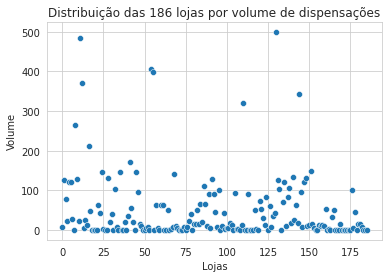

In [84]:

plt.xlabel('Lojas')
plt.ylabel('Volume')
plt.title("Distribuição das {qtd} lojas por volume de dispensações".format(qtd=dados["receitas_disp"].count()))
sns.scatterplot(data = dados["receitas_disp"])
plt.show()

### Total de lojas

In [85]:
dados["receitas_disp"].count()

186

### Média de dispensações

In [86]:
dados["receitas_disp"].mean()

49.526881720430104

### Total de dispensações

In [87]:
dados["receitas_disp"].sum()

9212.0

#Calibragem do limite para classificação volume
A variável limite_volume_normal define o limite entre o grupo de lojas que serão consideradas com volume normal ou Alto volume. Ela pode ser definida com base na observação do gráfico de dispersão apresentado anteriormente

In [88]:
limite_volume_normal = 100

# Volume normal
Lojas que possuam o total dispensações por mês abaixo do valor definido pela variável limite_volume_normal e acima de zero.

In [89]:
volume_normal = dados.query("receitas_disp<={limite}".format(limite=limite_volume_normal)).query("receitas_disp>0")

### Total de lojas com volume normal

In [90]:
volume_normal["receitas_disp"].count()

104

### Total de dispensações do grupo

In [91]:
volume_normal["receitas_disp"].sum()

3096.0

### Representação em relação ao volume total

In [92]:
(volume_normal["receitas_disp"].sum() / total) * 100

33.608336951801995

### Representação em relação ao total de lojas

In [93]:
(volume_normal["receitas_disp"].count() / dados["receitas_disp"].count()) * 100

55.91397849462365

# Alto volume
Lojas com volume total de dispensações por mês acima do valor definido pela variável limite_volume_normal.

In [94]:
alto_volume = dados.query("receitas_disp>{limite}".format(limite=limite_volume_normal))

In [95]:
alto_volume_total = alto_volume["receitas_disp"].sum()

### Total de lojas com alto volume de dispensações

In [96]:
alto_volume["receitas_disp"].count()

31

### Total de dispensações do grupo

In [97]:
alto_volume_total

6116.0

### Representação em relação ao volume total

In [98]:
(alto_volume_total / total) * 100

66.391663048198

### Representação em relação ao total de lojas

In [99]:
(alto_volume["receitas_disp"].count() / dados["receitas_disp"].count()) * 100

16.666666666666664

# Sem dispensações
Lojas que não realizaram dispensação de receitas

In [100]:
sem_dispensacoes = dados.query("receitas_disp==0")

### Total de lojas do grupo

In [101]:
sem_dispensacoes["receitas_disp"].count()

51

### Representação em relação ao total de lojas

In [102]:
(sem_dispensacoes["receitas_disp"].count() / dados["receitas_disp"].count()) * 100

27.419354838709676

#Resumo

In [103]:
resumo = np.array([["Normal ({limite})".format(limite=limite_volume_normal), volume_normal["receitas_disp"].count()],
   ["Alto (+{limite})".format(limite=limite_volume_normal), alto_volume["receitas_disp"].count()],
   ['Sem dispensações', sem_dispensacoes["receitas_disp"].count()]])

In [104]:
dfresumo = pd.DataFrame(resumo, index=range(100,103),columns=['Status', 'Quantidade'])

In [105]:
dfresumo

,Status,Quantidade
100,Normal (100),104
101,Alto (+100),31
102,Sem dispensações,51


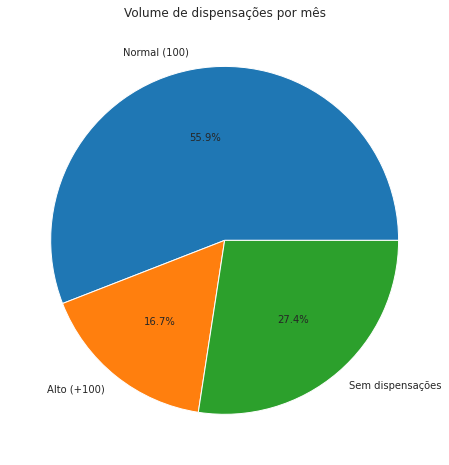

In [106]:
fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie(x = dfresumo['Quantidade'], labels = dfresumo['Status'], autopct='%1.1f%%')
ax1.set_title('Volume de dispensações por mês')
plt.show()

## Exportando as lojas em planilhas agrupadas por volume

In [107]:
volume_normal.to_excel('lojas_dispensacoes_volume_normal.xlsx')

In [108]:
alto_volume.to_excel('lojas_dispensacoes_volume_alto.xlsx')

In [109]:
sem_dispensacoes.to_excel('lojas_sem_dispensacoes.xlsx')